# PHYS 139 Final Project

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import random as random

%matplotlib inline

## Mine Accident Data

In [36]:
data = pd.read_csv('mine_data.csv')

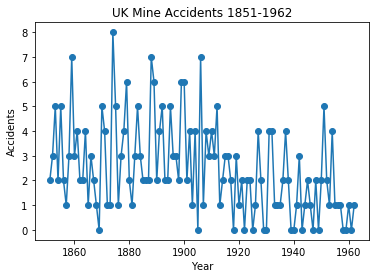

In [37]:
plt.plot('year', 'accidents', '-o', data=data)
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.title('UK Mine Accidents 1851-1962')
plt.show()

In [88]:
# Leon Part 1 
# normalized gamma distribution 

beofre_gamma = np.random.gamma
years = data.year.values
accidents = data.accidents.values

def our_func(lam, a, b):
    return lam**(a - 1) * np.exp(-b * lam)

def mcmc(steps):
    
    a1 = a2 = b1 = b2 = 0
    
    n_0 = 61
    track_lambda_1 = []
    track_lambda_2 = []
    track_n_0 = []
    
    for step in range(steps):
        # Before Change at n_0
        lambda_1 = np.random.gamma(a1 + np.sum(accidents[:n_0]), 1./(n_0 + b1))
        
        # After Change at n_0
        lambda_2 = np.random.gamma(a2 + np.sum(accidents[n_0:]), 1./(len(years) - n_0 + b2))
        
        # add to records 
        track_lambda_1.append(lambda_1)
        track_lambda_2.append(lambda_2)
        
        # Sample the change of year n_0 
        p_of_n_0 = [np.exp(np.log(lambda_1) * np.sum(accidents[:y]) - lambda_1 * y 
                  + np.log(lambda_2) * np.sum(accidents[y:]) - lambda_2 * (len(years) - y))
                    for y in range(1, len(years))]
        
        # tricky line, gives multiple probabilities that the specific poissian is chosen 
        probs = p_of_n_0/np.sum(p_of_n_0)
        probs = np.cumsum(probs)
        rand = np.random.random()
        new_n_0 = 0
        for i in range(len(probs)):
            if rand < probs[i]:
                new_n_0 = i + 1
                break
        # create probabilities 
        n_0 = new_n_0
        track_n_0.append(n_0)
        
    return track_lambda_1, track_lambda_2, track_n_0

l1, l2, change_year = mcmc(10000)

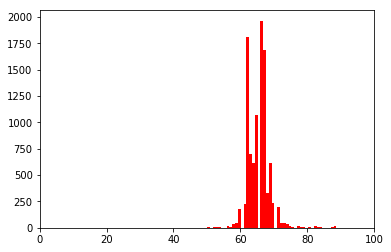

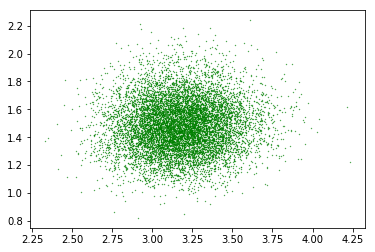

In [89]:
plt.hist(change_year, 50, color='red', label='$n_0$')
plt.xlim(0, 100)
plt.show()
plt.scatter(l1, l2, color='green', s=0.1)    